In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import roc_curve, auc,classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
df=pd.read_csv('referral.csv', index_col=False)
#df = pd.DataFrame.from_csv('referral.csv')
df.head()


,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [3]:
df.user_id.unique().shape

(18809,)

In [4]:
df=df.sort_values('date')

In [5]:
df.tail()

,user_id,date,country,money_spent,is_referral,device_id
96551,6787,2015-11-27,FR,61,1,ZQBWTBOLFKYIO
96550,6783,2015-11-27,IT,54,0,ORRFYYNXIUMMM
96549,6752,2015-11-27,ES,39,0,NNQYNPVSHSBAI
96565,7052,2015-11-27,CA,30,1,ONEDBUCSPAPKX
97340,19984,2015-11-27,FR,15,1,VFXAMMQDFORSS


In [6]:
df.device_id.unique().shape

(17887,)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97341 entries, 0 to 97340
Data columns (total 6 columns):
user_id        97341 non-null int64
date           97341 non-null object
country        97341 non-null object
money_spent    97341 non-null int64
is_referral    97341 non-null int64
device_id      97341 non-null object
dtypes: int64(3), object(3)
memory usage: 5.2+ MB


In [8]:
df.describe()

,user_id,money_spent,is_referral
count,97341.000000,97341.000000,97341.000000
mean,6354.801029,44.692360,0.287823
std,5682.991186,22.791839,0.452751
min,1.000000,10.000000,0.000000
25%,2020.000000,27.000000,0.000000
50%,4053.000000,42.000000,0.000000
75%,10286.000000,59.000000,1.000000
max,20000.000000,220.000000,1.000000


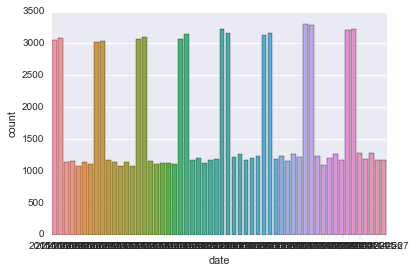

In [9]:
sns.set(style="darkgrid")
ax = sns.countplot(x="date", data=df)
plt.show()

In [10]:
#df_pre = df[(df['date'] < '2015-10-31')]
#df_post = df[(df['date'] >= '2015-10-31')]

df_pre = df.loc[df.date < '2015-10-30']
df_post = df.loc[df.date >= '2015-10-30']

In [11]:
df['timestamp'] = pd.to_datetime(df.date)

In [12]:
df["weekday"]=[t.weekday() for t in df["timestamp"]]
daily_total = df.groupby(["is_referral","timestamp","weekday"]).agg({"money_spent":"sum"}).reset_index()
daily_total.head()

,is_referral,timestamp,weekday,money_spent
0,0,2015-10-03,5,128475
1,0,2015-10-04,6,130772
2,0,2015-10-05,0,46946
3,0,2015-10-06,1,49711
4,0,2015-10-07,2,45242


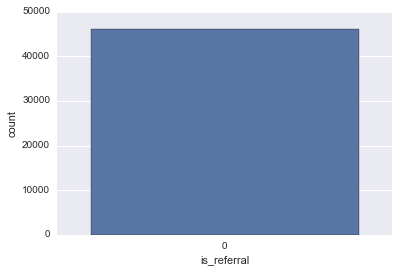

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="is_referral", data=df_pre)
plt.show()

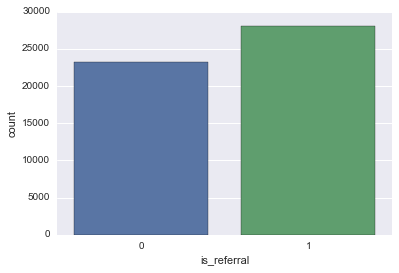

In [14]:
sns.set(style="darkgrid")
ax = sns.countplot(x="is_referral", data=df_post)
plt.show()


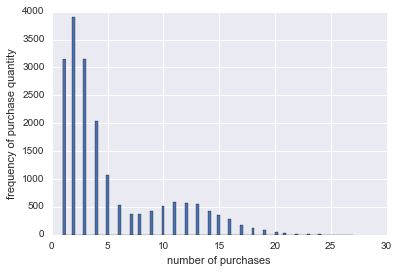

In [16]:
#get number of purcahses per user
users=pd.pivot_table(df,index=['user_id'],aggfunc={'user_id' : 'count'})

users.sort_values('user_id',ascending=False)

plt.hist(users['user_id'],bins=100)
plt.ylabel('frequency of purchase quantity')
plt.xlabel('number of purchases')
plt.show()
#here we see that a lot of users made only a few purchases 2), but a good number also made like 12

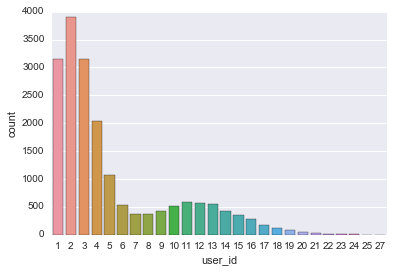

In [17]:
sns.set(style="darkgrid")
ax = sns.countplot(x='user_id', data=users)
plt.show()

In [18]:
print df_pre['user_id'].unique().shape
print df_post['user_id'].unique().shape


(5000,)
(18480,)


In [19]:
pre_user_num=df_pre.user_id.unique().shape

In [20]:
print(df_pre.describe())
print '---------------------------------------'
print(df_post.describe())


            user_id   money_spent  is_referral
count  46153.000000  46153.000000      46153.0
mean    2491.737417     42.364830          0.0
std     1439.709156     20.682966          0.0
min        1.000000     10.000000          0.0
25%     1250.000000     26.000000          0.0
50%     2486.000000     40.000000          0.0
75%     3742.000000     55.000000          0.0
max     5000.000000    177.000000          0.0
---------------------------------------
            user_id   money_spent   is_referral
count  51188.000000  51188.000000  51188.000000
mean    9837.882512     46.790947      0.547335
std     5827.519435     24.348589      0.497759
min        1.000000     10.000000      0.000000
25%     4636.000000     28.000000      0.000000
50%     9782.500000     44.000000      1.000000
75%    14921.000000     62.000000      1.000000
max    20000.000000    220.000000      1.000000


In [21]:
revenue_pre = df_pre.agg({'money_spent':'sum' })
revenue_post = df_post.agg({'money_spent':'sum' })

In [22]:
df_post.groupby('is_referral').user_id.nunique()

is_referral
0    11622
1    12715
Name: user_id, dtype: int64

In [23]:
df_post.user_id.nunique()

18480

In [24]:
df_post.groupby('is_referral').user_id.unique()

is_referral
0    [3333, 3345, 3352, 3340, 3338, 3332, 3310, 332...
1    [13148, 13150, 13161, 13134, 13177, 13143, 132...
Name: user_id, dtype: object

In [25]:
user_refered=df_post.groupby('is_referral').user_id.nunique()[1]

In [26]:
(revenue_post-(float(user_refered)*10))-revenue_pre


money_spent    312721.0
dtype: float64

In [27]:
print(df_post.describe())

            user_id   money_spent   is_referral
count  51188.000000  51188.000000  51188.000000
mean    9837.882512     46.790947      0.547335
std     5827.519435     24.348589      0.497759
min        1.000000     10.000000      0.000000
25%     4636.000000     28.000000      0.000000
50%     9782.500000     44.000000      1.000000
75%    14921.000000     62.000000      1.000000
max    20000.000000    220.000000      1.000000


In [28]:
df

,user_id,date,country,money_spent,is_referral,device_id,timestamp,weekday
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015-10-03,5
2026,3359,2015-10-03,FR,52,0,SLTOQRGXCRCDR,2015-10-03,5
2027,3361,2015-10-03,IT,15,0,JCVODKLEUCOHG,2015-10-03,5
2028,3363,2015-10-03,MX,22,0,TYNDFWAGPLAWW,2015-10-03,5
2029,3365,2015-10-03,DE,28,0,KFMTKUTQJIKNQ,2015-10-03,5
2030,3367,2015-10-03,DE,78,0,IYWSGFTCZPPXK,2015-10-03,5
2031,3368,2015-10-03,DE,71,0,AFJJUPQKHUKMR,2015-10-03,5
2032,3372,2015-10-03,MX,33,0,VWFNKWVNMXCPB,2015-10-03,5
2033,3373,2015-10-03,US,19,0,UYTSZDACUXQVW,2015-10-03,5
2034,3374,2015-10-03,US,30,0,LKEZQJDZFVLDP,2015-10-03,5


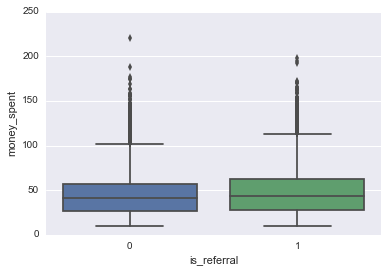

In [29]:
#average transaction of referaal and non-referral 
sns.boxplot(x="is_referral", y="money_spent", data =df)

In [30]:
df = df.merge(df.groupby('user_id')["user_id"].count().reset_index(name="count"),on=['user_id'], how='left')

In [31]:
df.head()

,user_id,date,country,money_spent,is_referral,device_id,timestamp,weekday,count
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015-10-03,5,14
1,3359,2015-10-03,FR,52,0,SLTOQRGXCRCDR,2015-10-03,5,14
2,3361,2015-10-03,IT,15,0,JCVODKLEUCOHG,2015-10-03,5,14
3,3363,2015-10-03,MX,22,0,TYNDFWAGPLAWW,2015-10-03,5,11
4,3365,2015-10-03,DE,28,0,KFMTKUTQJIKNQ,2015-10-03,5,15


In [32]:
df = df.merge(df_pre.groupby('user_id')["user_id"].count().reset_index(name="count_pre"),on=['user_id'], how='left')

In [33]:
df = df.merge(df_post.groupby('user_id')["user_id"].count().reset_index(name="count_post"),on=['user_id'], how='left')

In [34]:
df = df.fillna(0)
df.head()

,user_id,date,country,money_spent,is_referral,device_id,timestamp,weekday,count,count_pre,count_post
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015-10-03,5,14,11.0,3.0
1,3359,2015-10-03,FR,52,0,SLTOQRGXCRCDR,2015-10-03,5,14,9.0,5.0
2,3361,2015-10-03,IT,15,0,JCVODKLEUCOHG,2015-10-03,5,14,14.0,0.0
3,3363,2015-10-03,MX,22,0,TYNDFWAGPLAWW,2015-10-03,5,11,8.0,3.0
4,3365,2015-10-03,DE,28,0,KFMTKUTQJIKNQ,2015-10-03,5,15,14.0,1.0


In [35]:
df.describe()

,user_id,money_spent,is_referral,weekday,count,count_pre,count_post
count,97341.000000,97341.000000,97341.000000,97341.000000,97341.000000,97341.000000,97341.000000
mean,6354.801029,44.692360,0.287823,3.804307,9.357609,6.172959,3.184650
std,5682.991186,22.791839,0.452751,2.043796,5.478831,5.446563,1.684704
min,1.000000,10.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2020.000000,27.000000,0.000000,2.000000,4.000000,0.000000,2.000000
50%,4053.000000,42.000000,0.000000,5.000000,10.000000,7.000000,3.000000
75%,10286.000000,59.000000,1.000000,6.000000,14.000000,11.000000,4.000000
max,20000.000000,220.000000,1.000000,6.000000,27.000000,21.000000,11.000000


In [36]:
devices = df.groupby("device_id").user_id.nunique().reset_index()
devices.columns = ['device_id','num_users']
print(devices.sort_values('num_users',ascending=False))

           device_id  num_users
5589   ICNAOXZYHRUAJ          6
614    AWGTEQRKHBJIX          6
5383   HUYRSSPXDDXOV          6
7371   KRCJDOKOJKBRI          6
11418  QPBBTRFFAXPZK          6
12074  ROGVQQZEUXDPP          6
2447   DLXRTYWSFWWMM          6
9366   NOGAETBPGEMCS          6
3811   FNCXJPUMZIIUD          5
16921  YOUFIFIHBKBGL          5
4118   FYYLMHYOVZFRH          5
3846   FOLFCBHQFAEPV          5
7060   KFIHNKTUQDOVL          5
9785   ODZENCMHUBWGF          5
2362   DIVNMBNATWJBZ          5
90     ADMNVGYYYQUGG          5
16431  XWJZOFTOVEPSN          5
15785  WYKZBIQQFLXQY          5
4103   FYJZYTAPFMCHD          5
13560  TRRWVSWCDXMQD          5
480    ARPWVRJIXNPQF          5
8934   MYOMHLAFJTZVI          5
13543  TRFMIUAPPWHEH          5
8807   MUJCIXYTDNFOR          5
7280   KNIBGXNIBBDOM          5
7893   LMHUDCDGJPXYC          5
11801  RDQZAFXYSYYXN          5
1372   BYKRZALYKIGAF          5
4889   HCHXOMWZFWECD          5
15954  XFCELNGZLAYCP          5
...     

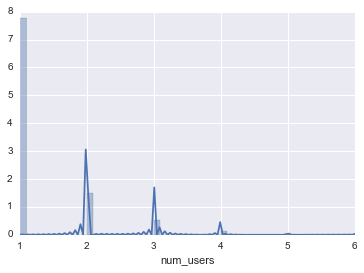

In [37]:
#Distribution of number of users
sns.distplot(devices.num_users)

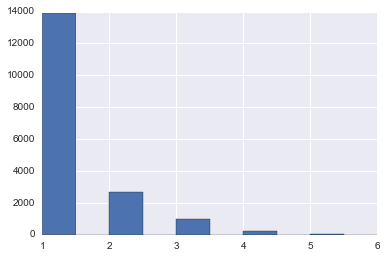

In [38]:
#histogram of number of users
devices.num_users.hist()
plt.show()

In [39]:
def device_df(df_):
    device_id_list = []
    count_user_list = []
    for val,group in df_.groupby('device_id'):
       [device_id,count_user]=val, len(group['user_id'].unique())
       device_id_list.append(device_id)
       count_user_list.append(count_user)
    device_df = pd.DataFrame(columns=['device_id','count_user'])
    device_df['device_id'] = device_id_list
    device_df['count_user'] = count_user_list
    return device_df

In [40]:
device_df_pre=device_df(df_pre)

In [41]:
device_df_pre.describe()

,count_user
count,7264.000000
mean,1.006883
std,0.082685
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [42]:
device_df_post=device_df(df_post)

In [43]:
device_df_post.describe()


,count_user
count,15244.000000
mean,1.369326
std,0.712246
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


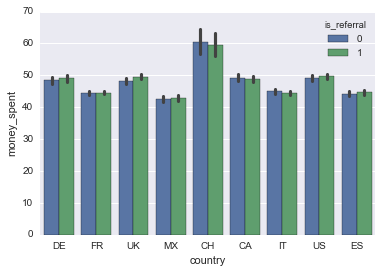

In [44]:
ax = sns.barplot(x="country", y="money_spent",hue='is_referral', data=df_post)

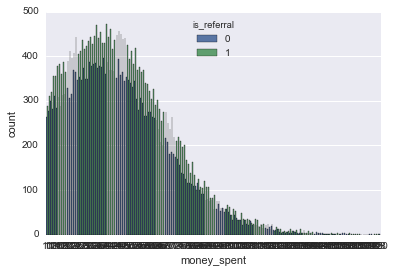

In [45]:
sns.countplot(x='money_spent', hue='is_referral', data =df_post)

In [46]:
df['isAfter'] = np.where(df['date']>= '2015-10-31', 1, 0)

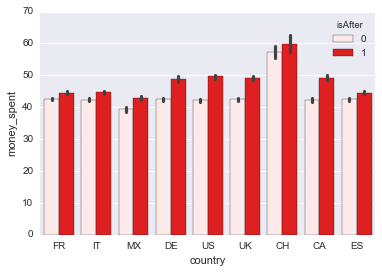

In [47]:
ax = sns.barplot(x="country", y="money_spent",hue='isAfter', data=df,color='red')

In [48]:
df_pre.groupby('country').user_id.nunique()

country
CA    3072
CH     684
DE    3587
ES    2826
FR    3676
IT    3124
MX    2484
UK    3804
US    3921
Name: user_id, dtype: int64

In [49]:

df_post.groupby('country').user_id.nunique()


country
CA    4103
CH     485
DE    4226
ES    4898
FR    7128
IT    5557
MX    4180
UK    6750
US    6253
Name: user_id, dtype: int64

In [50]:
daily_count_df_after = df_post.groupby('date').user_id.count().reset_index()
daily_count_df_before = df_pre.groupby('date').user_id.count().reset_index()


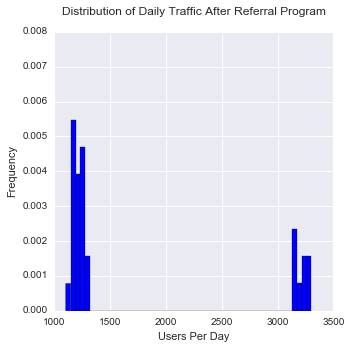

In [51]:
## Plot normalized histogram of query results.

plt.figure(figsize = (5,5))
plt.hist(daily_count_df_after.user_id, bins = 50, edgecolor = 'k', facecolor = 'b', normed = True)
plt.title('Distribution of Daily Traffic After Referral Program'+'\n')
plt.ylim([0,.008])
plt.xlabel('Users Per Day')
plt.ylabel('Frequency')
plt.show()

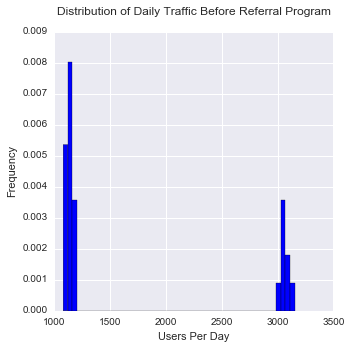

In [52]:
plt.figure(figsize = (5,5))
plt.hist(daily_count_df_before.user_id, bins = 50, edgecolor = 'k', facecolor = 'b', normed = True)
plt.title('Distribution of Daily Traffic Before Referral Program'+'\n')
plt.xlabel('Users Per Day')
plt.ylabel('Frequency')
plt.show()

base on the plots shown above, number of purchases per day before and after the referral program are not significantly different. The purchase rate during weekends is greater than during weekdays, ~3000 purchases/day.